<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Water-runs,-rewards,-and-learning" data-toc-modified-id="Water-runs,-rewards,-and-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Water runs, rewards, and learning</a></span><ul class="toc-item"><li><span><a href="#Time-line-of-water-rewards-for-each-mouse" data-toc-modified-id="Time-line-of-water-rewards-for-each-mouse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time line of water rewards for each mouse</a></span><ul class="toc-item"><li><span><a href="#Figure-3A" data-toc-modified-id="Figure-3A-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Figure 3A</a></span></li></ul></li><li><span><a href="#Length-of-path-from-start-of-bout-to-water-port" data-toc-modified-id="Length-of-path-from-start-of-bout-to-water-port-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Length of path from start of bout to water port</a></span><ul class="toc-item"><li><span><a href="#Figure-3B" data-toc-modified-id="Figure-3B-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Figure 3B</a></span></li></ul></li></ul></li><li><span><a href="#Home-runs" data-toc-modified-id="Home-runs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Home runs</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-home-run-lengths" data-toc-modified-id="Distribution-of-home-run-lengths-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution of home run lengths</a></span><ul class="toc-item"><li><span><a href="#Figure-5B" data-toc-modified-id="Figure-5B-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Figure 5B</a></span></li></ul></li><li><span><a href="#Home-run-start-locations" data-toc-modified-id="Home-run-start-locations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Home run start locations</a></span><ul class="toc-item"><li><span><a href="#Figure-5A" data-toc-modified-id="Figure-5A-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Figure 5A</a></span></li></ul></li><li><span><a href="#Do-the-animals-retrace-their-steps?" data-toc-modified-id="Do-the-animals-retrace-their-steps?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Do the animals retrace their steps?</a></span><ul class="toc-item"><li><span><a href="#Figure-5–figure-supplement-1" data-toc-modified-id="Figure-5–figure-supplement-1-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Figure 5–figure supplement 1</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
TestTrajModule()

'OK'

In [3]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [4]:
# Define maze
ma = NewMaze(6)

# Water runs, rewards, and learning

## Time line of water rewards for each mouse

### Figure 3A

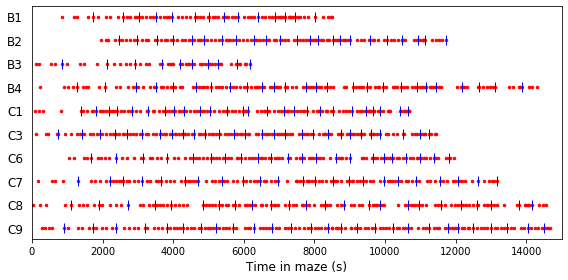

In [5]:
# Time line of rewards, ticks every 5 rewards
ax=plot([0],[0],figsize=(8,4));
for i,nickname in enumerate(RewNames):
    tf=LoadTraj(nickname+'-tf')
    # make array of reward times in frames
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
    ti=np.array([TimeInMaze(r,tf) for r in re])
    plot(ti,[9-i,]*len(ti),fmts=['r.'],axes=ax)
    t5=ti[4::5]
    plot(t5,[9-i,]*len(t5),fmts=['b|'],markersize=10,xlim=[0,15000],xlabel='Time in maze (s)',axes=ax)
    ax.text(-700, 9-i-0.2, nickname, fontsize=12)
ax.get_yaxis().set_visible(False)
plt.savefig('figs/Timeline5.pdf')
plt.show();

## Length of path from start of bout to water port
This is the equivalent of the errors-vs-trials curve in the classic maze papers. Every error from the direct path adds two more steps to the length of the run.

In [6]:
# analyze the first water visit in each bout, save to file
w=[] # list of arrays
for i,nickname in enumerate(RewNames):
    tf=LoadTraj(nickname+'-tf')
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r]) # reward times in frames
    wd=[];wt=[];wr=[];wl=[]
    for j,b in enumerate(tf.no):
        wk=np.where(b[:,0]==116)[0] # node index of visits to water port
        if len(wk)>0: # if there was a visit to water port
            d=b[wk[0],1] # frames from start of bout to water port
            t=tf.fr[j,0]+d # absolute time of that visit in frames
            rk=np.where(re>t)[0] # rewards after time t
            if len(rk)==0: # if no reward after t
                r=len(re) # total number of rewards
            else:
                r=rk[0] # number of rewards received before t
            wd+=[d/30] # seconds from start of bout to water port
            wt+=[t/30] # absolute time of that visit in seconds
            wr+=[r] # number of rewards prior to that visit
            wl+=[wk[0]] # number of steps to water port
    w+=[np.array([wd,wt,wr,wl])] 
with open('outdata/FirstWaterRuns', 'wb') as f:
    pickle.dump((RewNames,w),f)

### Figure 3B

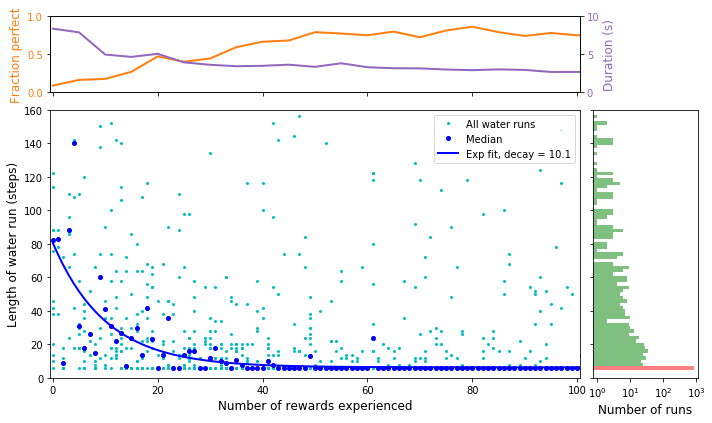

In [7]:
# Exponential fit to the median run for each reward value; plot all data in background
def func(x, a, b, c): # exponential fit
    return a * np.exp(-b * x) + c

with open('outdata/FirstWaterRuns', 'rb') as f:
    RewNames,w=pickle.load(f)
u=np.concatenate(w,axis=-1)
ar=u[2] # number of rewards prior to this path
al=u[3] # length of this path
ar1=ar[al<1000];al1=al[al<1000] # eliminate single outlier

rl=sorted(list(set(ar))) # sorted list of all reward numbers
re=[];me=[];sd=[];se=[]
for r in rl:
    x=al1[ar1==r]
    re+=[r]
    me+=[np.median(x)] # median of all the durations at that reward number

popt, pcov = curve_fit(func, re[:101], me[:101], p0=[50,.1,10]) # fit the exponential
        
fig, axes = plt.subplots(2, 2,figsize=(10,6),gridspec_kw={'width_ratios': [5, 1],'height_ratios': [1, 3.5]})

plot(ar,al,fmts=['co'],markersize=2,
         xlabel='Number of rewards experienced',ylabel='Length of water run (steps)',axes=axes[1,0]);
plot(re,me,fmts=['bo'],markersize=4,axes=axes[1,0]);
x=np.arange(re[-1]+1) # reward number
plot(x,func(x,*popt),fmts=['b-'],linewidth=2,ylim=[0,160],xlim=[-0.5,100.5],
    legend=['All water runs','Median','Exp fit, decay = {:.1f}'.format(1/popt[1])], # ,'Mean ± SEM'
    loc='upper right',axes=axes[1,0]);

hist([al[al==6],al[al>6]],bins=np.arange(-1,161,2),xlabel='Number of runs',
    orientation='horizontal',xhide=False,yhide=False,ylim=[0,160],xscale='log',xticks=[1e0,1e1,1e2,1e3],
    axes=axes[1,1]); # ,yticks=[0,0.5,1],
axes[1,1].tick_params(labelleft=False) 

bin=5 # reward binning 
g0=np.where(al==6)[0] # perfect runs
g1=np.where(al>6)[0] # longer runs
r0=sorted(ar[g0]) # sorted reward numbers for perfect paths
r1=sorted(ar[g1]) # sorted reward numbers for longer paths
# _,n,bins,_=hist([r0,r1],bins=np.arange(140//bin)*bin);
n0,bins=np.histogram(r0,bins=np.arange(140//bin)*bin); # histo of reward numbers for perfect paths
n1,_=np.histogram(r1,bins=np.arange(140//bin)*bin); # histo of reward numbers for longer paths
y0=n0/(n0+n1) # fraction of perfect paths in each reward number bin
y1=n1/(n0+n1) # fraction of longer paths in each reward number bin
x=bins[:-1] # reward number bins
du=[np.median(u[0,np.logical_and(u[3]==6,np.logical_and(u[2]>=i,u[2]<i+bin))]) # median duration of perfect paths
    for i in x] # in each bin of reward numbers

ax1=axes[0,0] # top left graph
color = 'tab:orange'
ax1.set_ylabel('Fraction perfect', color=color,fontsize=12)
ax1.plot(x,y0, color=color,linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(labelbottom=False)
ax1.set_xlim([-0.5,100.5])
ax1.set_ylim([0,1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:purple'
ax2.set_ylabel('Duration (s)', color=color,fontsize=12)  # we already handled the x-label with ax1
ax2.plot(x, du, color=color,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,10])

# plot(x,y0,fmts=['r-','g-'],ylim=[0,1],ylabel='Fraction perfect',grid=True,
#     loc='center right',xlim=[-0.5,100.5],axes=axes[0,0]); # ,title='Runs from entrance to water port: length distribution vs rewards'

axes[0,1].axis('off') 

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.subplots_adjust(wspace=0.04,hspace=0.1)
plt.savefig('figs/WaterRunLengthMedianHistStack.pdf')

# Home runs

In [8]:
# Find all the home runs and save in a file
Names=RewNames+UnrewNamesSub
HR=[]
for nickname in Names:
    tf=LoadTraj(nickname+'-tf')
    hr=FindPathsToExit(tf,ma) # Finds all monotonic trajectories to the exit
    HR+=[hr]
HR=np.array(HR)
with open('outdata/HomeRuns', 'wb') as f:
    pickle.dump((Names,HR),f)    


## Distribution of home run lengths

### Figure 5B

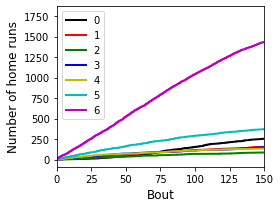

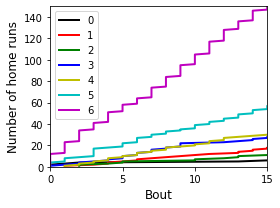

In [9]:
# cumulative number of home runs from different levels, total over all animals
k=len(RewNames) # number of rewarded animals
with open('outdata/HomeRuns', 'rb') as f:
    Names,HR=pickle.load(f)    
x=[]
y=[]
for i in range(7):
    z=[np.where(hr[:,2]==i+1)[0] for hr in HR] # home run number for home runs from level i, ignores bouts with no home run
    z=np.concatenate(z)
    z=np.sort(z)
    x+=[z] 
    y+=[np.arange(1,len(z)+1)] # cumulative count per animal
plot(x,y,fmts=['k-','r-','g-','b-','y-','c-','m-'],markersize=1,linewidth=2,
     legend=['0','1','2','3','4','5','6'],
     xlabel='Bout',ylabel='Number of home runs',xlim=[0,150],
     figsize=(4,3));
plt.savefig('figs/HomeRunLengths.pdf')
plt.show()
plot(x,y,fmts=['k-','r-','g-','b-','y-','c-','m-'],markersize=1,linewidth=2,
     legend=['0','1','2','3','4','5','6'],
     xlabel='Bout',ylabel='Number of home runs',xlim=[0,15],ylim=[0,150],xticks=[0,5,10,15],
     figsize=(4,3));
plt.savefig('figs/HomeRunLengthsZoom.pdf')
plt.show()


## Home run start locations

### Figure 5A

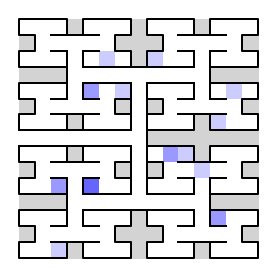

In [10]:
# distribution of the first home run starts in the maze for all animals
with open('outdata/HomeRuns', 'rb') as f:
    Names,HR=pickle.load(f)    
st=[hr[hr[:,2]>1,1][0] for hr in HR] # first home run start for each animal, if past first intersection
fr,_=np.histogram(st,bins=np.arange(2**(ma.le+1))-0.5)
# fr=np.log(fr+1)/np.log(np.max(fr+1))
col=np.array([[0,1,1,1],[1,.8,.8,1],[2,.6,.6,1],[3,.4,.4,1]])
ax=PlotMazeFunction(fr,ma,mode='nodes',numcol=None,figsize=4,col=col);
re=[[-0.5,0.5,1,1],[-0.5,4.5,1,1],[-0.5,8.5,1,1],[-0.5,12.5,1,1],
   [2.5,13.5,1,1],[6.5,13.5,1,1],[10.5,13.5,1,1],
   [13.5,12.5,1,1],[13.5,8.5,1,1],[13.5,4.5,1,1],[13.5,0.5,1,1],
   [10.5,-0.5,1,1],[6.5,-0.5,1,1],[2.5,-0.5,1,1],
   [6.5,1.5,1,1],[6.5,11.5,1,1],[10.5,5.5,1,1],[10.5,7.5,1,1],
   [5.5,4.5,1,1],[5.5,8.5,1,1],[7.5,4.5,1,1],[7.5,8.5,1,1],[2.5,5.5,1,1],[2.5,7.5,1,1],
   [-0.5,2.5,3,1],[-0.5,10.5,3,1],[11.5,10.5,3,1],[11.5,2.5,3,1],[5.5,0.5,3,1],[5.5,12.5,3,1],
   [7.5,6.5,7,1]]
for r in re:
    rect=patches.Rectangle((r[0],r[1]),r[2],r[3],linewidth=1,edgecolor='lightgray',facecolor='lightgray')
    ax.add_patch(rect)
plt.axis('off'); # turn off the axes
plt.savefig('figs/FirstHomeStarts.pdf')

## Do the animals retrace their steps?
This would be like Theseus following the Ariadne's thread exactly as he laid it down, even if he crossed the same point twice.

If this is what the mice do, then the beginning of a trajectory should be the reverse of the end of the trajectory.

So, for every bout we compare the outgoing and returning sequence of nodes and mark how many they have in common.

In [11]:
# compute overlap between outbound and return paths on each bout
lr=[] # list of overlaps for rewarded animals
lu=[] # list of overlaps for unrewarded animals
for li,na in zip([lr,lu],[RewNames,UnrewNamesSub]):
    for nickname in na:
        tf=LoadTraj(nickname+'-tf')
        for bo in tf.no:
            no=bo[:,0] # array of states in this bout
            if len(no)>1: # if more than just exit state
                i=-1
                while i<(len(no)-2)//2 and no[i+1]==no[-i-3]: # //2 divides trajectory into outbound and return 
                    i+=1 # while outbound and return states are the same
                li+=[i+1] # number of states of overlap between outbound and return
            else: # if bout has only exit state
                li+=[0]
    li=np.array(li)

### Figure 5–figure supplement 1

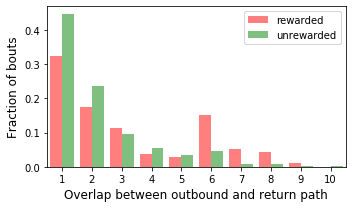

In [12]:
# Plot fraction of all home runs for each value of overlap
hist([lr,lu],bins=np.arange(-0.5,20.5,1),histtype='bar',density=True,
    legend=['rewarded','unrewarded'],
    xlim=[0.5,10.5],xlabel='Overlap between outbound and return path',ylabel='Fraction of bouts',
    xticks=list(range(1,11)));
plt.savefig('figs/OutReturnOverlapFraction.pdf')